In [190]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [191]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# Описание данных
## ads_data.csv – данные взаимодействий с рекламными объявлениями

### date – дата
### time – время
### event – действие (просмотр/клик)
### platform – платформа
### ad_id – id объявления
### client_union_id – id рекламного кабинета
### campaign_union_id – id рекламной кампании
### ad_cost_type – тип оплаты
### ad_cost – цена
### has_video – есть ли видео
### target_audience_count – размер аудитории
### ads_clients_data.csv – характеристики рекламных клиентов

### date – дата
### client_union_id – id рекламного кабинета
### community_id – id сообщества
### create_date – дата создания рекламного клиента

# Задача 1 "Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел."

In [192]:
ads_data = pd.read_csv('D:/курс_архив/my_files/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [193]:
ads_data 

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [194]:
ads_clients_data = pd.read_csv('D:/курс_архив/my_files/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [195]:
ads_clients_data= ads_clients_data.drop('date', axis=1)

In [196]:
ads_clients_data

,client_union_id,community_id,create_date
0,1,-130371893,2018-12-24
1,2,-130304626,2019-02-10
2,3,-130462599,2019-01-25
3,4,-130574300,2018-12-09
4,5,-130292358,2019-01-08
...,...,...,...
122073,122074,-130470790,2018-12-21
122074,122075,-130911261,2018-11-09
122075,122076,-130494912,2018-10-27
122076,122077,-130910585,2018-12-05


In [197]:
# Фильтруем события для показа объявлений (event == "view")
views = ads_data.query('event == "view"') \
    .groupby('ad_id', as_index=False) \
    .agg({'event': 'count'})
views
# Здесь мы выбираем все строки с показами объявлений, затем группируем данные по 'ad_id' (ID объявления).
# Для каждого объявления считаем количество показов.

,ad_id,event
0,2,101
1,3,184
2,1902,41
3,2064,35
4,2132,58
...,...,...
951,122004,100
952,122013,156
953,122023,68
954,122031,138


In [198]:
# Суммируем общее количество показов
views.event.sum()
# Подсчитываем общее количество всех показов для всех объявлений.

np.int64(890822)

In [199]:
# 3. Фильтруем события для кликов по объявлениям (event == "click")
clicks = ads_data.query('event == "click"') \
    .groupby('ad_id', as_index=False) \
    .agg({'event': 'count'})
clicks
# Аналогично предыдущему шагу, фильтруем строки, где событие — это клик,
# затем группируем данные по 'ad_id' и считаем количество кликов для каждого объявления.

,ad_id,event
0,2,1
1,3,3
2,1902,1
3,2132,1
4,2494,1
...,...,...
520,121893,2
521,121896,1
522,121964,5
523,122004,4


In [200]:
# Суммируем общее количество кликов
clicks.event.sum()
# Подсчитываем общее количество кликов по всем объявлениям.

np.int64(109178)

In [201]:
# Подсчет общего количества уникальных объявлений
ad_id_count = ads_data.ad_id.nunique()
# Здесь мы считаем количество уникальных объявлений в наборе данных с помощью 'nunique'.
ad_id_count

965

In [202]:
# Рассчитываем среднее количество показов на одно объявление
(views.event.sum() / ad_id_count).round(0)
# Мы делим общее количество показов на количество уникальных объявлений.
# Округляем результат до ближайшего целого числа.

np.float64(923.0)

In [203]:
# Рассчитываем среднее количество кликов на одно объявление
(clicks.event.sum() / ad_id_count).round(0)
# Аналогично, делим общее количество кликов на количество уникальных объявлений.
# Округляем результат до ближайшего целого числа.

np.float64(113.0)

# Среднее количество кликов на объявление 113 . Среднее количество показов на объявление 923

# Задача 2 "Давайте посмотрим на распределение показов объявлений!"

## По оси x – число показов
## По оси y – доля объявлений с такими показами
### Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

In [204]:
views['log_event'] = np.log(views.event)

In [205]:
views

,ad_id,event,log_event
0,2,101,4.615121
1,3,184,5.214936
2,1902,41,3.713572
3,2064,35,3.555348
4,2132,58,4.060443
...,...,...,...
951,122004,100,4.605170
952,122013,156,5.049856
953,122023,68,4.219508
954,122031,138,4.927254


C:\Users\bedzh\AppData\Local\Temp\ipykernel_24468\4262686165.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='log_event', ylabel='Density'>

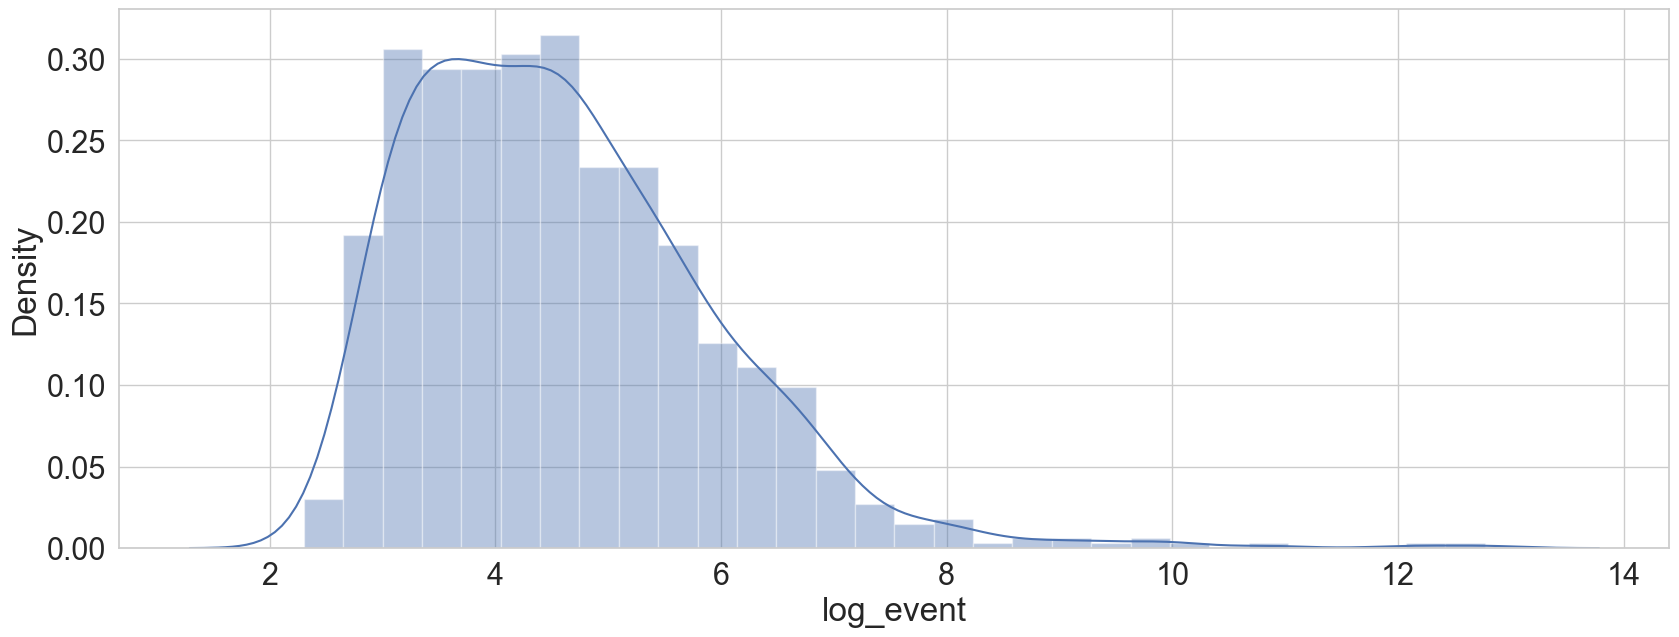

In [206]:
sns.distplot(views.log_event)

# Задача 4
## Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

### Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [208]:
# Посмотрим для начала какой тип данных принимает колонка date.
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [209]:
# Преобразование столбца 'date' в формат даты
ads_data['date'] = pd.to_datetime(ads_data.date)

In [210]:
ads_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [211]:
# Фильтруем данные, оставляя только события с показами (event == "view")
# Группируем по объявлениям и датам, считая количество показов для каждого объявления в конкретный день
daily_views_per_ad = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'})
daily_views_per_ad

,ad_id,date,event
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [212]:
# Группируем по датам и считаем среднее количество показов на одно объявление за день
daily_avg_views = daily_views_per_ad.groupby('date') \
    .agg({'event': 'mean'}) \
    .rolling(2).mean().round(0)
# Рассчитываем скользящее среднее с окном в 2 элемента, округляем результат до целых чисел

In [213]:
# Выводим результат скользящего среднего
daily_avg_views

,event
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


# Ответ: 2019-04-06 = 598.0

# Задача 5 "Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании)."

## Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

In [214]:
# Группируем данные по дате и считаем среднее количество показов на одно объявление за день
daily_average_views = daily_views_per_ad.groupby('date') \
    .agg({'event': 'mean'}).reset_index()
# Метод `reset_index()` сбрасывает индекс, чтобы дата стала отдельным столбцом.
daily_average_views

,date,event
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [215]:
# Сбрасываем индекс и удаляем строки с NaN значениями (если такие есть)
daily_avg_views.reset_index().dropna()
# Сбрасываем индекс ещё раз и удаляем строки с отсутствующими значениями с помощью метода `dropna()`.

,date,event
1,2019-04-02,146.0
2,2019-04-03,151.0
3,2019-04-04,420.0
4,2019-04-05,798.0
5,2019-04-06,598.0


In [216]:
# Объединяем две таблицы `daily_average_views` и `daily_avg_views` по дате
daily_average_views = daily_average_views.merge(daily_avg_views, how='inner', on='date')
# Соединяем данные на основе общего столбца `date`. Используем тип соединения 'inner', чтобы оставить только общие даты.
daily_average_views

,date,event_x,event_y
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


In [217]:
# Сбрасываем индекс и снова удаляем строки с NaN значениями
daily_average_views = daily_average_views.reset_index().dropna()

In [218]:
# Проверяем результат объединения и очистки данных
daily_average_views

,index,date,event_x,event_y
1,1,2019-04-02,137.786982,146.0
2,2,2019-04-03,163.952778,151.0
3,3,2019-04-04,675.901720,420.0
4,4,2019-04-05,919.109677,798.0
5,5,2019-04-06,277.122727,598.0


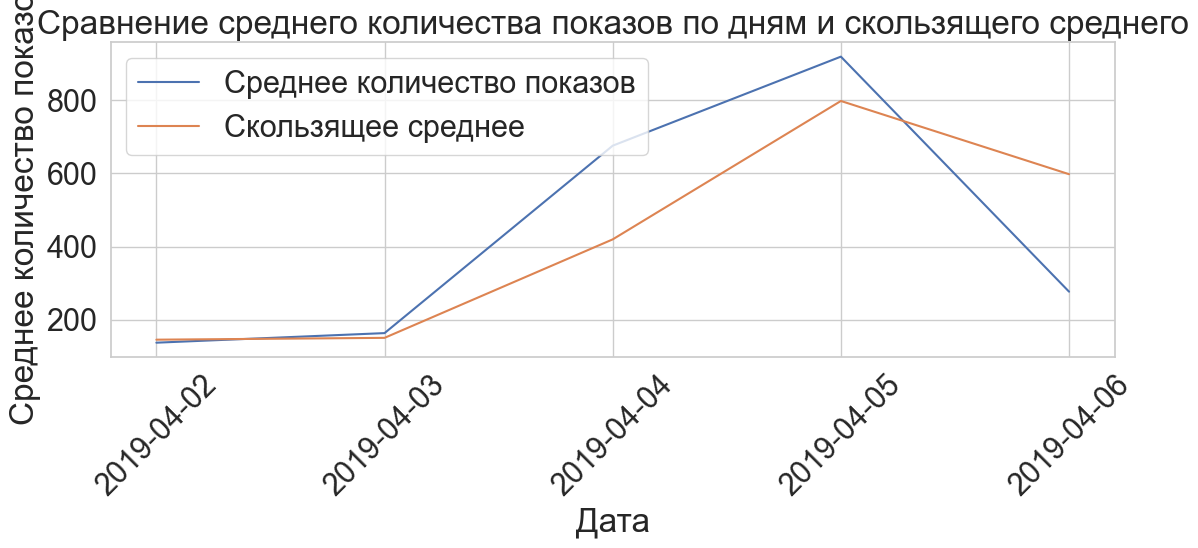

In [219]:
# Строим график для сравнения обычного и скользящего среднего
plt.figure(figsize=(12, 6))

# Линия обычного среднего по дням
sns.lineplot(data=daily_average_views, x="date", y="event_x", label='Среднее количество показов')

# Линия скользящего среднего
sns.lineplot(data=daily_average_views, x="date", y="event_y", label='Скользящее среднее')

# Настраиваем формат оси X для даты
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Форматируем дату как 'yyyy-MM-dd'

# Устанавливаем шаг по оси X для улучшенной читаемости
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Отображаем каждую дату (можно настроить интервал)

# Оформление графика
plt.title('Сравнение среднего количества показов по дням и скользящего среднего')
plt.xlabel('Дата')
plt.ylabel('Среднее количество показов')
plt.xticks(rotation=45)  # Поворачиваем метки даты для лучшей читаемости
plt.grid(True)
plt.legend()

plt.tight_layout()  # Чтобы не было перекрытия элементов
plt.show()


# Ответ: Наибольшая разница по модулю между арифметическим средним и скользящим средним наблюдается 2019-04-06	

# Задача 6
## Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания 
## рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

### В качестве ответа укажите среднее число дней.

In [220]:
# Объединяем данные о рекламе и данные о рекламных клиентах по общему столбцу 'client_union_id'
all_frame = ads_data.merge(ads_clients_data, on='client_union_id', how='inner')
# Мы используем 'inner' соединение, чтобы оставить только те строки, которые есть в обеих таблицах (клиенты и реклама).

In [221]:
# Проверка результата объединения
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19


In [222]:
# Преобразуем столбцы 'date' (дата запуска рекламы) и 'create_date' (дата создания клиента) в формат datetime
all_frame['date'] = pd.to_datetime(all_frame['date'])
all_frame['create_date'] = pd.to_datetime(all_frame['create_date'])
# Преобразуем строки дат в формат datetime, чтобы с ними можно было работать как с датами (например, вычитать).

In [223]:
# Проверка типов данных после преобразования
all_frame.dtypes # Проверяем, что столбцы 'date' и 'create_date' стали типом datetime

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [224]:
# Вычисляем разницу между датой создания клиента и датой запуска рекламы для каждого объявления
all_frame['difference'] = all_frame.date - all_frame.create_date
# Добавляем новый столбец 'difference', который хранит количество дней между созданием клиента и первым запуском рекламы.
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days


In [225]:
# Группируем данные по клиентам (client_union_id) и находим минимальную разницу (первое рекламное событие для каждого клиента)
# После этого считаем среднее количество дней между созданием клиента и первым запуском рекламы
all_frame.groupby('client_union_id') \
    .agg({'difference': 'min'}) \
    .mean()
# Группируем данные по клиенту ('client_union_id'), чтобы найти минимальное значение в столбце 'difference' (т.е. дату первой рекламы).
# Затем считаем среднее по всем клиентам, чтобы найти среднее количество дней.

difference   124 days 09:04:43.532219570
dtype: timedelta64[ns]

# Вывод среднего числа дней от даты создания: 124 дня

# Задача 7
## Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.
### Ответ дайте в процентах и округлите до сотых.

In [226]:
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days


In [227]:
# Отбираем данные для клиентов, которые запустили свою первую рекламу в течение 365 дней после создания кабинета
dataframe = all_frame.query('difference < "365d"') \
    .groupby("client_union_id", as_index=False) \
    .agg({'difference': 'count'})
# Используем метод query для фильтрации строк, где разница между датой создания кабинета и первым запуском рекламы составляет меньше 365 дней.
# Затем группируем данные по 'client_union_id' (уникальные клиенты) и считаем количество таких записей.
dataframe

,client_union_id,difference
0,1,289
1,9,42
2,13,35
3,16,59
4,20,3412
...,...,...
833,122004,104
834,122013,156
835,122023,68
836,122031,139


In [228]:
# Считаем общее количество уникальных клиентов в ads_clients_data (все клиенты, создавшие рекламный кабинет)
total_clients = ads_clients_data.client_union_id.nunique()
# Используем метод nunique() для подсчета уникальных клиентов в таблице ads_clients_data (все клиенты).
total_clients

122078

In [229]:
# Считаем общее количество уникальных клиентов в 'ads_data запустивших рекламу' 
clients_with_ads = ads_data.client_union_id.nunique()
clients_with_ads

838

In [230]:
# Рассчитываем конверсию: отношение клиентов, запустивших рекламу, к общему числу клиентов
conversion_rate = (clients_with_ads / total_clients) * 100
conversion_rate_rounded = round(conversion_rate, 2)
# Вычисляем процентное соотношение клиентов, запустивших рекламу в течение 365 дней, к общему числу клиентов. 
# Округляем конверсию до сотых и выводим результат
conversion_rate_rounded

0.69

# Ответ 0.69

# Задача 8 
## Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

### Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования 
### (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 
### Создать временные промежутки можно с помощью pd.to_timedelta().

In [231]:
dataframe.dtypes

client_union_id    int64
difference         int64
dtype: object

In [232]:
# Устанавливаем интервалы для разбиения клиентов по промежуткам времени (от 0 до 30, 90, 180, и 365 дней)
# Используем pd.to_timedelta для создания промежутков времени
all_frame['time_interval'] = pd.cut(unique_clients['difference'], bins=pd.to_timedelta(["0 days", "30 days", "90 days", "180 days", "365 days"]),
                                                    labels= ["less than 30 days", "from 30 to 90 days", "from 90 to 180 days", "more than 180 days"])
# Применяем pd.cut для разбиения клиентов по временным интервалам на основе разницы во времени 'difference'
# Промежутки будут разделены с метками для каждого диапазона
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference,time_interval
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days,from 90 to 180 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days,from 90 to 180 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days,from 90 to 180 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days,more than 180 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days,from 30 to 90 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,NaN
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,NaN
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,NaN
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days,NaN


In [233]:
# Удаляем дубликаты по столбцу 'client_union_id', чтобы учитывать только уникальных клиентов
# Мы хотим учитывать каждого клиента только один раз.
unique_clients = all_frame.drop_duplicates(subset=['client_union_id'])

In [234]:
# Считаем количество клиентов, попадающих в каждый временной интервал
# all_frame.value_counts()
clients_by_interval = unique_clients['time_interval'].value_counts()
clients_by_interval

time_interval
from 90 to 180 days    395
from 30 to 90 days     263
more than 180 days     169
less than 30 days       11
Name: count, dtype: int64

# Ответ: 11 уникальных клиентов запустили свое первое объявление в первый месяц своего существования 

# Задача 9 
# Постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [235]:
clients_by_interval = pd.DataFrame(clients_by_interval)
clients_by_interval

,count
time_interval,
from 90 to 180 days,395
from 30 to 90 days,263
more than 180 days,169
less than 30 days,11


C:\Users\bedzh\AppData\Local\Temp\ipykernel_24468\2603052041.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




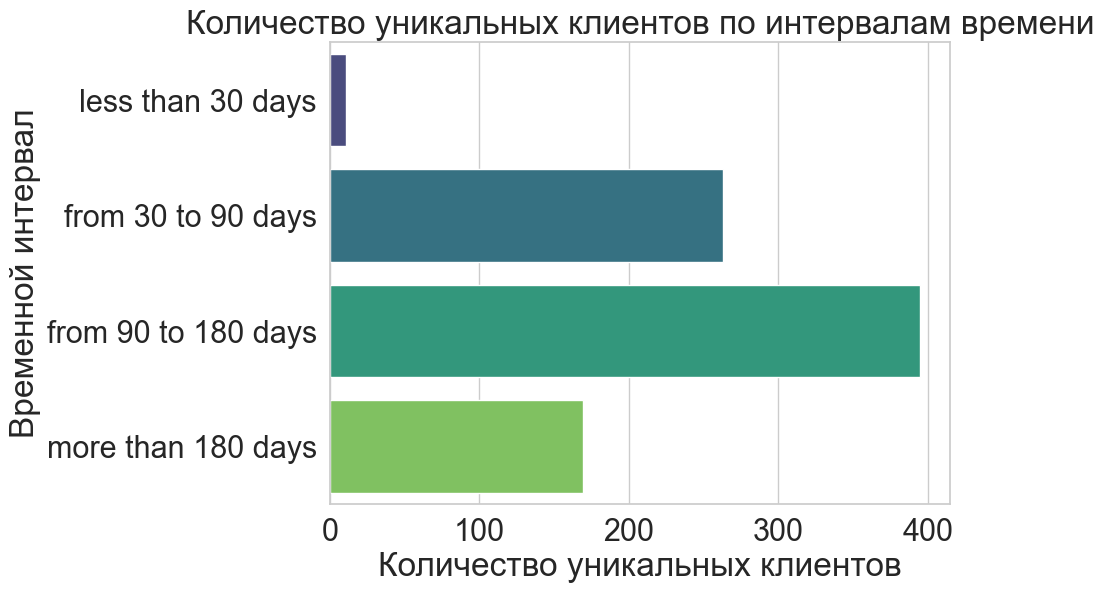

In [236]:
# 2. Построение графика с помощью seaborn
plt.figure(figsize=(8, 6))  # Задаем размер графика
sns.barplot(x='count', y='time_interval', data=clients_by_interval, palette='viridis')

# 3. Настройка графика
plt.title('Количество уникальных клиентов по интервалам времени')
plt.xlabel('Количество уникальных клиентов')
plt.ylabel('Временной интервал')

# 4. Отображение графика
plt.show()